install necessary packages

In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandasql as ps
import re
import matplotlib.pyplot as plt
from collections import Counter


I will start by reading in the two Jane Austen books from project gutenberg: "Sense and Sensibility" and "Pride and Prejudice"

In [30]:
url_sense = "https://www.gutenberg.org/files/21839/21839-0.txt"
url_pride = "https://www.gutenberg.org/files/1342/1342-0.txt"

response_sense = requests.get(url_sense)
response_pride = requests.get(url_pride)

if response_sense.status_code == 200 and response_pride.status_code == 200:
    sense_data = response_sense.text
    pride_data = response_pride.text

Next I am splitting these books I've read in by words

In [31]:
# Data Cleaning and Splitting into Words for Sense and Sensibility
sense_words = sense_data.split()

# Data Cleaning and Splitting into Words for Pride and Prejudice
pride_words = pride_data.split()

Next, we'll make 2 series that will have the words extracted from the two texts.

In [32]:
 # Create Series for Sense and Sensibility and Pride and Prejudice
sense_series = pd.Series(sense_words, name="Sense and Sensibility")
pride_series = pd.Series(pride_words, name="Pride and Prejudice")

Finally, I'll merge these two data sets.

In [33]:
# Concatenate Series to form the DataFrame
austen_merged_df = pd.concat([sense_series, pride_series], axis=1)

# Display the DataFrame with words from both books in separate columns
print(austen_merged_df.head())


  Sense and Sensibility Pride and Prejudice
0                ï»¿The              ï»¿The
1               Project             Project
2             Gutenberg           Gutenberg
3                 eBook               eBook
4                    of                  of


Next I will clean the data some by chunking this text by sentences. I'll look for normal sentence endings like "!,?,." to make sense of where each sentence starts and stops.

I'll do this for both books.

In [34]:
 # Data Cleaning and Splitting into Sentences
sentences_sense = re.split(r'\. |\? |\! ', sense_data)  
sentences_pride = re.split(r'\. |\? |\! ', pride_data) 

Next, I'd like to calcultate the word count in each of books by the sentences I've just broken them down to.

In [35]:
# Calculate word count for each sentence
sentence_word_counts_sense = [len(sentence.split()) for sentence in sentences_sense]
sentence_word_counts_pride = [len(sentence.split()) for sentence in sentences_pride]

Now to calculate cumulative word counts, this will help with later tracking sentences in chapters.

In [36]:
# Calculate cumulative word count for sentences
cumulative_word_counts_sense = [sum(sentence_word_counts_sense[:i+1]) for i in range(len(sentence_word_counts_sense))]
cumulative_word_counts_pride = [sum(sentence_word_counts_pride[:i+1]) for i in range(len(sentence_word_counts_pride))]

Next I'd like to make columns for this sentence data in the data frames I've already made. 

In [37]:
  # Add the sentence data and cumulative word counts to the sense_data DataFrame
sense_data_df = pd.DataFrame({
        "Sentence": sentences_sense,
        "Word_Count": cumulative_word_counts_sense
    
    })

 # Add the sentence data and cumulative word counts to the pride_data DataFrame
pride_data_df = pd.DataFrame({
        "Sentence": sentences_pride,
        "Word_Count": cumulative_word_counts_pride
      
    })

Next, I will calculate total word count for each novel. I'd like to see that. 

In [40]:
# Calculate total word count for each book
total_word_count_sense = len(sense_words)
total_word_count_pride = len(pride_words)

I wonder how many 'unique' words are in each book? What words were used in one novel and not the other? 

In [41]:
# Calculate unique word count for each book
unique_word_count_sense = len(set(sense_words))
unique_word_count_pride = len(set(pride_words))

I wonder what the average word length is for both novel?

In [42]:
# Calculate average word length for each book
average_word_length_sense = sum(len(word) for word in sense_words) / total_word_count_sense
average_word_length_pride = sum(len(word) for word in pride_words) / total_word_count_pride

I'll now make a bar chart for total unique words.

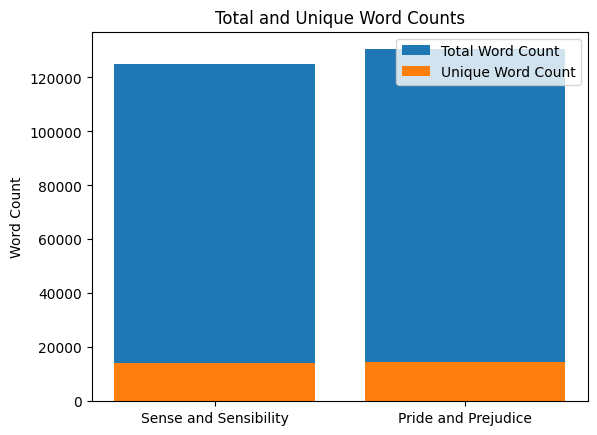

In [43]:
# Plot bar chart for total and unique word counts
fig, ax = plt.subplots()
ax.bar(["Sense and Sensibility", "Pride and Prejudice"], [total_word_count_sense, total_word_count_pride], label='Total Word Count')
ax.bar(["Sense and Sensibility", "Pride and Prejudice"], [unique_word_count_sense, unique_word_count_pride], label='Unique Word Count')
ax.set_ylabel('Word Count')
ax.legend()
plt.title('Total and Unique Word Counts')
plt.show()

I'll now make a bar chart for average word length betwen the two books.

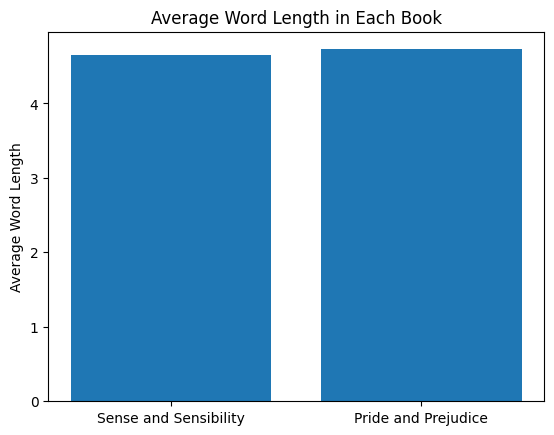

In [45]:
# Plot bar chart for average word length
fig, ax = plt.subplots()
ax.bar(["Sense and Sensibility", "Pride and Prejudice"], [average_word_length_sense, average_word_length_pride])
ax.set_ylabel('Average Word Length')
plt.title('Average Word Length in Each Book')
plt.show()

I will now make a line chart.

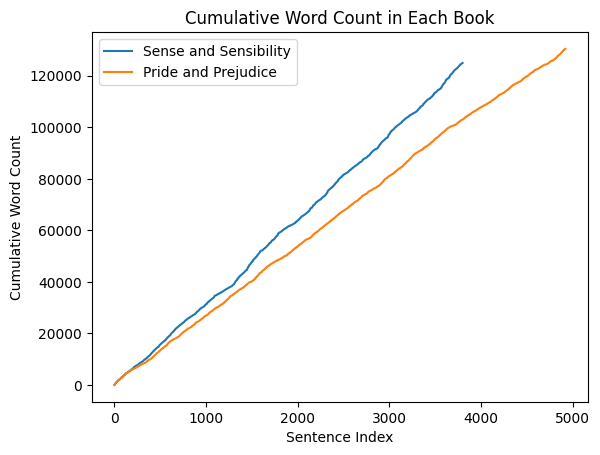

In [46]:
# Create line chart for cumulative word count
fig, ax = plt.subplots()
ax.plot(sense_data_df['Word_Count'], label='Sense and Sensibility')
ax.plot(pride_data_df['Word_Count'], label='Pride and Prejudice')
ax.set_xlabel('Sentence Index')
ax.set_ylabel('Cumulative Word Count')
ax.legend()
plt.title('Cumulative Word Count in Each Book')
plt.show()

In [44]:
#word_count_comparison = austen_merged_df["Words"].value_counts()

#sentence_length_sense = sense_data.split(".")
#sentence_length_pride = pride_data.split(".")

#avg_sentence_length_sense = sum(len(sentence.split()) for sentence in sentence_length_sense) / len(sentence_length_sense)
#avg_sentence_length_pride = sum(len(sentence.split()) for sentence in sentence_length_pride) / len(sentence_length_pride)


In [ ]:
print("Word Count Comparison:")
print(word_count_comparison)

print("\nAverage Sentence Length (Sense and Sensibility):")
print(avg_sentence_length_sense)

print("\nAverage Sentence Length (Pride and Prejudice):")
print(avg_sentence_length_pride)

Word Count Comparison:
Words
the           18743913
to            17698500
of            14683896
and           11613239
a              4242079
                ...   
deceived;            1
miserable;           1
forwarded            1
gone;                1
eBooks.              1
Name: count, Length: 6910, dtype: int64

Average Sentence Length (Sense and Sensibility):
23.867677725118483

Average Sentence Length (Pride and Prejudice):
19.716469354113592


In [ ]:
# Line Chart
#plt.subplot(1, 3, 2)
#plt.plot([0, 1], [avg_sentence_length_sense, avg_sentence_length_pride], marker="o")
#plt.title("Average Sentence Length")
#plt.xticks([0, 1], ["Sense and Sensibility", "Pride and Prejudice"])
#plt.xlabel("Novel")
#plt.ylabel("Average Length")


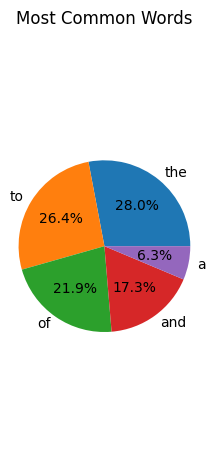

In [ ]:
query = "SELECT Words, COUNT(*) as Count FROM merged_df GROUP BY Words ORDER BY Count DESC LIMIT 5"
result = ps.sqldf(query) 

# Pie Chart
plt.subplot(1, 3, 3)
plt.pie(result["Count"], labels=result["Words"], autopct="%1.1f%%")
plt.title("Most Common Words")
plt.axis("equal")

plt.tight_layout()
plt.show()

In [ ]:
# Data Cleaning and Splitting into Chapters
chapters = re.split(r'\bChapter \d+\b', pride_data)[1:]  # Splitting based on chapter headings
chapter_numbers = [f"Chapter {i}" for i in range(1, len(chapters) + 1)]

# Calculate word count for each chapter
word_counts = [len(chapter.split()) for chapter in chapters]

# Create a DataFrame to store the chapter data
chapter_df = pd.DataFrame({
        "Chapter": chapter_numbers,
        "Content": chapters,
        "Word_Count": word_counts
    })

 # Display the DataFrame
print(chapter_df)


Empty DataFrame
Columns: [Chapter, Content, Word_Count]
Index: []
